In [ ]:
import pandas as pd
plant1_Gen = pd.read_csv('https://raw.githubusercontent.com/sorayutmild/SuperAIEngineer/main/Plant_1_Generation_Data.csv')
plant1_Weat = pd.read_csv('https://raw.githubusercontent.com/sorayutmild/SuperAIEngineer/main/Plant_1_Weather_Sensor_Data.csv')
plant2_Gen = pd.read_csv('https://raw.githubusercontent.com/sorayutmild/SuperAIEngineer/main/Plant_2_Generation_Data.csv')
plant2_Weat = pd.read_csv('https://raw.githubusercontent.com/sorayutmild/SuperAIEngineer/main/Plant_2_Weather_Sensor_Data.csv')


In [ ]:
plant1_Gen.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [ ]:
plant1_Weat.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0




```
# Focusing on Plant_1_Generation_Data
```



จะเห็นได้ว่า data ถูก clean มาบ้างแล้ว เลยไม่มี missing values 

In [ ]:
# check missing values
plant1_Gen.isnull().any()

DATE_TIME      False
PLANT_ID       False
SOURCE_KEY     False
DC_POWER       False
AC_POWER       False
DAILY_YIELD    False
TOTAL_YIELD    False
dtype: bool

In [ ]:
plant1_Gen.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [ ]:
# สร้าง dataframe ที่แสดงแต่ date_time กับ TOTAL_YIELD จะเห็นได้ว่า ที่datetime เดียวกัน มี total_yield หลายค่า
datetime = plant1_Gen[["DATE_TIME", "TOTAL_YIELD"]]
datetime

,DATE_TIME,TOTAL_YIELD
0,15-05-2020 00:00,6259559.0
1,15-05-2020 00:00,6183645.0
2,15-05-2020 00:00,6987759.0
3,15-05-2020 00:00,7602960.0
4,15-05-2020 00:00,7158964.0
...,...,...
68773,17-06-2020 23:45,7287002.0
68774,17-06-2020 23:45,7028601.0
68775,17-06-2020 23:45,7251204.0
68776,17-06-2020 23:45,6583369.0


ลอง group by datetime แล้วนับจำนวน total_yield ในแต่ละ datetime 

จะเห็นว่า ในแต่ละ 15 นาที จะมี 15 samples

In [ ]:
# group by datetime แล้วนับจำนวน total_yield ในแต่ละ datetime 
gb_datetime = plant1_Gen[["DATE_TIME", "TOTAL_YIELD"]].groupby("DATE_TIME").count()
print("a number of datetime {}". format(len(gb_datetime)))
gb_datetime.head()

a number of datetime 3158


,TOTAL_YIELD
DATE_TIME,
01-06-2020 00:00,22
01-06-2020 00:15,22
01-06-2020 00:30,22
01-06-2020 00:45,22
01-06-2020 01:00,22


In [ ]:
# ลอง groupby SOURCE_KEY หรือ เครื่องผลิตไฟฟ้า เพื่อดูว่าแต่ละเครื่องผลิตกี่ sample 
gb_datetime = plant1_Gen[["SOURCE_KEY", "TOTAL_YIELD"]].groupby("SOURCE_KEY").count()
gb_datetime

,TOTAL_YIELD
SOURCE_KEY,
1BY6WEcLGh8j5v7,3154
1IF53ai7Xc0U56Y,3119
3PZuoBAID5Wc2HD,3118
7JYdWkrLSPkdwr4,3133
McdE0feGgRqW7Ca,3124
VHMLBKoKgIrUVDU,3133
WRmjgnKYAwPKWDb,3118
YxYtjZvoooNbGkE,3104
ZnxXDlPa8U1GXgE,3130




```
# Focusing on Plant_1_Sensor_Weather_Data
```



In [ ]:
plant1_Weat.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [ ]:
plant1_Weat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [ ]:
plant1_Weat.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


จะเห็นว่าถ้า groupby DATE_TIME จะมี AMBIENT_TEMPERATURE  1 ตัว ในทุก 15นาที

In [ ]:
gb_p1_weat = plant1_Weat[["DATE_TIME", "AMBIENT_TEMPERATURE"]].groupby("DATE_TIME").count()
print("in every 15mins, there is AMBIENT_TEMPERATURE {} unit".format(len(gb_p1_weat.groupby("AMBIENT_TEMPERATURE"))))
gb_p1_weat.head()

in every 15mins, there is AMBIENT_TEMPERATURE 1 unit


,AMBIENT_TEMPERATURE
DATE_TIME,
2020-05-15 00:00:00,1
2020-05-15 00:15:00,1
2020-05-15 00:30:00,1
2020-05-15 00:45:00,1
2020-05-15 01:00:00,1


**Preprocessing**

*   Standardizing Data
*   Feature Engineering
*   Feature Selection




In [ ]:
plant1_Gen["DATE_TIME"] 

0        15-05-2020 00:00
1        15-05-2020 00:00
2        15-05-2020 00:00
3        15-05-2020 00:00
4        15-05-2020 00:00
               ...       
68773    17-06-2020 23:45
68774    17-06-2020 23:45
68775    17-06-2020 23:45
68776    17-06-2020 23:45
68777    17-06-2020 23:45
Name: DATE_TIME, Length: 68778, dtype: object

In [ ]:
# เปลี่ยน format วันเวลา ให้เป็น format pandas
plant1_Gen["DATE_TIME"] = pd.to_datetime(plant1_Gen["DATE_TIME"])
plant1_Weat["DATE_TIME"] = pd.to_datetime(plant1_Weat["DATE_TIME"])
print(plant1_Gen["DATE_TIME"].tail())
print(plant1_Weat["DATE_TIME"].head())

68773   2020-06-17 23:45:00
68774   2020-06-17 23:45:00
68775   2020-06-17 23:45:00
68776   2020-06-17 23:45:00
68777   2020-06-17 23:45:00
Name: DATE_TIME, dtype: datetime64[ns]
0   2020-05-15 00:00:00
1   2020-05-15 00:15:00
2   2020-05-15 00:30:00
3   2020-05-15 00:45:00
4   2020-05-15 01:00:00
Name: DATE_TIME, dtype: datetime64[ns]


จะเห็นได้ว่า จำนวนรูปแบบ SOUCE_KEY ใน plant1_Weat คือ 1 
ดังนั้น สามารถตัด feaeture นี้ ออกไปได้

In [ ]:
try:
  print("A number of plant1_Weat SOURCE_KEY is ", len(plant1_Weat[["SOURCE_KEY"]].groupby("SOURCE_KEY")))
  plant1_Weat_drop_sk = plant1_Weat.drop('SOURCE_KEY', 1)
except:
  pass
plant1_Weat_drop_sk.head()

A number of plant1_Weat SOURCE_KEY is  1


,DATE_TIME,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,24.621525,22.165423,0.0


In [ ]:
print("plant1_Gen row : ", plant1_Gen.shape[0])
print("plant1_Weat row : ", plant1_Weat.shape[0])

plant1_Gen row :  68778
plant1_Weat row :  3182


In [ ]:
# รวม feature ทั้งสองสองตาราง โดย map จาก DATE_TIME
plant1_total = pd.merge(plant1_Weat_drop_sk, plant1_Gen, on="DATE_TIME", how = "inner")
plant1_total.head()

,DATE_TIME,PLANT_ID_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PLANT_ID_y,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,25.184316,22.857507,0.0,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,25.184316,22.857507,0.0,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,25.184316,22.857507,0.0,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,25.184316,22.857507,0.0,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,25.184316,22.857507,0.0,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


จะเห็นได้ว่า  PLANT_ID_x และ  PLANT_ID_y มีค่าเท่าเดิมเสมอ จึงสามารถตัด featureนี้ ทิ้งออกไปได้

In [ ]:
# check and delete PLANT_ID_x,  PLANT_ID_y
try:
  print(len(plant1_total.groupby("PLANT_ID_x")))
  print(len(plant1_total.groupby("PLANT_ID_y")))
  plant1_total = plant1_total.drop('PLANT_ID_x', 1)
  plant1_total = plant1_total.drop('PLANT_ID_y', 1)
except:
  pass
plant1_total.head()

1
1


,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,25.184316,22.857507,0.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,25.184316,22.857507,0.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,25.184316,22.857507,0.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,25.184316,22.857507,0.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,25.184316,22.857507,0.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


McdE0feGgRqW7Ca
VHMLBKoKgIrUVDU


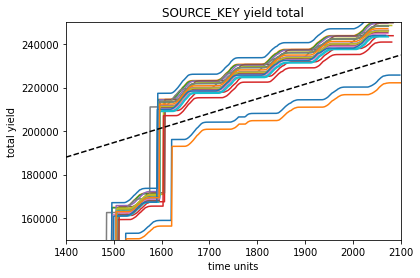

In [ ]:
import matplotlib.pyplot as plt
SK =  plant1_total[["SOURCE_KEY"]].groupby("SOURCE_KEY").count().index
plt.ylim(150000,250000)
plt.xlim(1400,2100)
plt.title("SOURCE_KEY yield total")
plt.xlabel("time units")
plt.ylabel("total yield")
initial = {}
for i in SK:
    a =  plant1_total[ plant1_total["SOURCE_KEY"]==i].reset_index()
    plt.plot(a["TOTAL_YIELD"] - a["TOTAL_YIELD"][0])
    initial[i] = a["TOTAL_YIELD"][0]
plt.plot([1400,2100],[188000,235000],c="black",linestyle="dashed")
print( plant1_total[["SOURCE_KEY"]].groupby("SOURCE_KEY").count().index[4])
print( plant1_total[["SOURCE_KEY"]].groupby("SOURCE_KEY").count().index[5])

In [ ]:
 plant1_total['growth_yield'] =  plant1_total['TOTAL_YIELD'] -  plant1_total['SOURCE_KEY'].apply(lambda v: initial[v])
 plant1_total.drop("TOTAL_YIELD", axis=1,inplace = True)
 plant1_total.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,growth_yield
0,2020-05-15,25.184316,22.857507,0.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,0.0
1,2020-05-15,25.184316,22.857507,0.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,0.0
2,2020-05-15,25.184316,22.857507,0.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,0.0
3,2020-05-15,25.184316,22.857507,0.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,0.0
4,2020-05-15,25.184316,22.857507,0.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np

day_past = 3
data = plant1_total.copy()
date = plant1_total['DATE_TIME']
for i in range(day_past):
    date = date + np.timedelta64(1,'D')
    p = data.copy()
    p['DATE_TIME'] = date
    data = pd.merge(data,p, on=["DATE_TIME", "SOURCE_KEY"], how="left",suffixes=("1","0"))
data.head()

,DATE_TIME,AMBIENT_TEMPERATURE111,MODULE_TEMPERATURE111,IRRADIATION111,SOURCE_KEY,DC_POWER111,AC_POWER111,DAILY_YIELD111,growth_yield111,AMBIENT_TEMPERATURE011,MODULE_TEMPERATURE011,IRRADIATION011,DC_POWER011,AC_POWER011,DAILY_YIELD011,growth_yield011,AMBIENT_TEMPERATURE101,MODULE_TEMPERATURE101,IRRADIATION101,DC_POWER101,AC_POWER101,DAILY_YIELD101,growth_yield101,AMBIENT_TEMPERATURE001,MODULE_TEMPERATURE001,IRRADIATION001,DC_POWER001,AC_POWER001,DAILY_YIELD001,growth_yield001,AMBIENT_TEMPERATURE110,MODULE_TEMPERATURE110,IRRADIATION110,DC_POWER110,AC_POWER110,DAILY_YIELD110,growth_yield110,AMBIENT_TEMPERATURE010,MODULE_TEMPERATURE010,IRRADIATION010,DC_POWER010,AC_POWER010,DAILY_YIELD010,growth_yield010,AMBIENT_TEMPERATURE100,MODULE_TEMPERATURE100,IRRADIATION100,DC_POWER100,AC_POWER100,DAILY_YIELD100,growth_yield100,AMBIENT_TEMPERATURE000,MODULE_TEMPERATURE000,IRRADIATION000,DC_POWER000,AC_POWER000,DAILY_YIELD000,growth_yield000
0,2020-05-15,25.184316,22.857507,0.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-05-15,25.184316,22.857507,0.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-05-15,25.184316,22.857507,0.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-05-15,25.184316,22.857507,0.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-05-15,25.184316,22.857507,0.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.isna().sum()

DATE_TIME                     0
AMBIENT_TEMPERATURE111        0
MODULE_TEMPERATURE111         0
IRRADIATION111                0
SOURCE_KEY                    0
DC_POWER111                   0
AC_POWER111                   0
DAILY_YIELD111                0
growth_yield111               0
AMBIENT_TEMPERATURE011     8845
MODULE_TEMPERATURE011      8845
IRRADIATION011             8845
DC_POWER011                8845
AC_POWER011                8845
DAILY_YIELD011             8845
growth_yield011            8845
AMBIENT_TEMPERATURE101    12687
MODULE_TEMPERATURE101     12687
IRRADIATION101            12687
DC_POWER101               12687
AC_POWER101               12687
DAILY_YIELD101            12687
growth_yield101           12687
AMBIENT_TEMPERATURE001    18858
MODULE_TEMPERATURE001     18858
IRRADIATION001            18858
DC_POWER001               18858
AC_POWER001               18858
DAILY_YIELD001            18858
growth_yield001           18858
AMBIENT_TEMPERATURE110    16516
MODULE_T

In [ ]:
data = data.fillna(0)
data.isna().sum()

DATE_TIME                 0
AMBIENT_TEMPERATURE111    0
MODULE_TEMPERATURE111     0
IRRADIATION111            0
SOURCE_KEY                0
DC_POWER111               0
AC_POWER111               0
DAILY_YIELD111            0
growth_yield111           0
AMBIENT_TEMPERATURE011    0
MODULE_TEMPERATURE011     0
IRRADIATION011            0
DC_POWER011               0
AC_POWER011               0
DAILY_YIELD011            0
growth_yield011           0
AMBIENT_TEMPERATURE101    0
MODULE_TEMPERATURE101     0
IRRADIATION101            0
DC_POWER101               0
AC_POWER101               0
DAILY_YIELD101            0
growth_yield101           0
AMBIENT_TEMPERATURE001    0
MODULE_TEMPERATURE001     0
IRRADIATION001            0
DC_POWER001               0
AC_POWER001               0
DAILY_YIELD001            0
growth_yield001           0
AMBIENT_TEMPERATURE110    0
MODULE_TEMPERATURE110     0
IRRADIATION110            0
DC_POWER110               0
AC_POWER110               0
DAILY_YIELD110      

In [ ]:
data['SOURCE_KEY'] = ['SK_low' if ((s =="McdE0feGgRqW7Ca") or (s == "bvBOhCH3iADSZry")) else 'SK_high' for s in data['SOURCE_KEY'] ]
data = pd.concat([data, pd.get_dummies(data['SOURCE_KEY'])], axis = "columns")
data.drop("SOURCE_KEY",axis=1, inplace=True)
data.head()

,DATE_TIME,AMBIENT_TEMPERATURE111,MODULE_TEMPERATURE111,IRRADIATION111,DC_POWER111,AC_POWER111,DAILY_YIELD111,growth_yield111,AMBIENT_TEMPERATURE011,MODULE_TEMPERATURE011,IRRADIATION011,DC_POWER011,AC_POWER011,DAILY_YIELD011,growth_yield011,AMBIENT_TEMPERATURE101,MODULE_TEMPERATURE101,IRRADIATION101,DC_POWER101,AC_POWER101,DAILY_YIELD101,growth_yield101,AMBIENT_TEMPERATURE001,MODULE_TEMPERATURE001,IRRADIATION001,DC_POWER001,AC_POWER001,DAILY_YIELD001,growth_yield001,AMBIENT_TEMPERATURE110,MODULE_TEMPERATURE110,IRRADIATION110,DC_POWER110,AC_POWER110,DAILY_YIELD110,growth_yield110,AMBIENT_TEMPERATURE010,MODULE_TEMPERATURE010,IRRADIATION010,DC_POWER010,AC_POWER010,DAILY_YIELD010,growth_yield010,AMBIENT_TEMPERATURE100,MODULE_TEMPERATURE100,IRRADIATION100,DC_POWER100,AC_POWER100,DAILY_YIELD100,growth_yield100,AMBIENT_TEMPERATURE000,MODULE_TEMPERATURE000,IRRADIATION000,DC_POWER000,AC_POWER000,DAILY_YIELD000,growth_yield000,SK_high,SK_low
0,2020-05-15,25.184316,22.857507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,2020-05-15,25.184316,22.857507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,2020-05-15,25.184316,22.857507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,2020-05-15,25.184316,22.857507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,2020-05-15,25.184316,22.857507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [ ]:
tenFold = []
labels = []
for k in range(10):
    m = []  
    y = []
    for v in data.loc[range(k,len(plant1_total),10)].to_numpy():
        m.append(np.append(v[1:7],v[8:]))
        y.append(v[7])
    tenFold.append(m)
    labels.append(y)
tenFold = np.array(tenFold)
labels = np.array(labels)
print("           (fold, data, features)\n tenFold: ",tenFold.shape)
print(" labels:  ", labels.shape)

           (fold, data, features)
 tenFold:  (10, 4568, 57)
 labels:   (10, 4568)


In [ ]:
!pip install catboost

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
import time
from sklearn import metrics
RF = RandomForestRegressor(max_depth=2, random_state=0)
XGB = xgb.XGBRegressor(n_estimators=50,
                       objective ='reg:squarederror',
                       learning_rate = 0.16,
                       colsample_bytree=0.6,
                       max_depth = 4,
                       min_child_weight = 6)
LR = LinearRegression()
CB = CatBoostRegressor(iterations=50,
                          learning_rate=0.16,
                          depth=4,
                      verbose=0)
clf = XGB

In [ ]:
MAE = []
MSE = []
RMSE = []
R2 = []
times = []
for i in range(len(tenFold)):
    start = time.time()
    for id, f in enumerate(tenFold):
      if id == i:
        continue
      clf.fit(f,labels[id])
    end = time.time()
    times.append(end - start)
    pred = clf.predict(tenFold[i])
    gt = labels[i]
    print(f"Fold #{i+1}---------------------------------------")
    mae = metrics.mean_absolute_error(gt, pred)
    MAE.append(mae)
    print('Mean Absolute Error (MAE):', mae)
    mse = metrics.mean_squared_error(gt, pred)
    MSE.append(mse)
    print('Mean Squared Error (MSE):', mse)
    rmse = np.sqrt(metrics.mean_squared_error(gt, pred))
    RMSE.append(rmse)
    print('Root Mean Squared Error (RMSE):', rmse)
    r2 = clf.score(tenFold[i], labels[i])
    R2.append(r2)
    print('R-Squared (R2):', r2)
    print('Time: ',end - start)
    print('')
    
print('\n\n')
print('AVG*********************************************')
print('Mean Absolute Error (MAE):', np.mean(MAE))
print('Mean Squared Error (MSE):', np.mean(MSE))
print('Root Mean Squared Error (RMSE):', np.mean(RMSE))
print('R-Squared (R2):', np.mean(R2))
print('Time :', np.mean(times))
print('************************************************')

Fold #1---------------------------------------
Mean Absolute Error (MAE): 7389.89941553311
Mean Squared Error (MSE): 253940996.63217467
Root Mean Squared Error (RMSE): 15935.52624271237
R-Squared (R2): 0.9587594516883382
Time:  3.761667490005493

Fold #2---------------------------------------
Mean Absolute Error (MAE): 7016.63628933572
Mean Squared Error (MSE): 242836357.82291383
Root Mean Squared Error (RMSE): 15583.207558872911
R-Squared (R2): 0.9599591352506741
Time:  3.6879169940948486

Fold #3---------------------------------------
Mean Absolute Error (MAE): 7327.303973660178
Mean Squared Error (MSE): 247583401.8952617
Root Mean Squared Error (RMSE): 15734.783185518056
R-Squared (R2): 0.9597932526825056
Time:  3.729830265045166

Fold #4---------------------------------------
Mean Absolute Error (MAE): 7029.102610397743
Mean Squared Error (MSE): 243511217.96414766
Root Mean Squared Error (RMSE): 15604.845976944074
R-Squared (R2): 0.9598528586604783
Time:  3.6763997077941895

Fold #

In [ ]:
def preprocessing(WS,GD, past):
    pWS = WS.copy()
    pGD = GD.copy()
    pGD = pGD.drop('PLANT_ID', axis='columns')
    pWS.drop(['PLANT_ID', 'SOURCE_KEY'], axis="columns", inplace=True)
    pGD["DATE_TIME"] = pd.to_datetime(pGD["DATE_TIME"])
    pWS["DATE_TIME"] = pd.to_datetime(pWS["DATE_TIME"])
    df = pd.merge(pWS,pGD, on="DATE_TIME", how="inner")
    SK = df[["SOURCE_KEY"]].groupby("SOURCE_KEY").count().index
    initial = {}
    for i in SK:
        a = df[df["SOURCE_KEY"]==i].reset_index()
        initial[i] = a["TOTAL_YIELD"][0]
    df['growth_yield'] = df['TOTAL_YIELD'] - df['SOURCE_KEY'].apply(lambda v: initial[v])
    df.drop("TOTAL_YIELD", axis=1,inplace = True)
    data = df.copy()
    date = df['DATE_TIME']
    p = data.copy()
    for t in range(past):
        date = date + np.timedelta64(1,'D')
        p['DATE_TIME'] = date
        data = pd.merge(data,p, on=["DATE_TIME", "SOURCE_KEY"], how="left",suffixes=("_present","_past"))
    data = data.fillna(0)
    data['SOURCE_KEY'] = ['SK_low' if ((s =="1BY6WEcLGh8j5v7") or (s == "bvBOhCH3iADSZry")) else 'SK_high' for s in data['SOURCE_KEY'] ]
    data = pd.concat([data, pd.get_dummies(data['SOURCE_KEY'])], axis = "columns")
    data.drop("SOURCE_KEY",axis=1, inplace=True)
    return data

def KFold(data, K=10):
    tenFold = []
    labels = []
    for k in range(K):
        m = []  
        y = []
        for v in data.loc[range(k,len(data),K)].to_numpy():
            m.append(np.append(v[1:7],v[8:]))
            y.append(v[7])
        tenFold.append(m)
        labels.append(y)
    tenFold = np.array(tenFold)
    labels = np.array(labels)
    return tenFold, labels

def evaluate(tenFold, labels, model):
    clf = model
    MAE = []
    MSE = []
    RMSE = []
    R2 = []
    times = []
    for i in range(len(tenFold)):
        start = time.time()
        for id, f in enumerate(tenFold):
          if id == i:
            continue
          clf.fit(np.array(f),np.array(labels[id]))
        end = time.time()
        times.append(end - start)
        pred = clf.predict(np.array(tenFold[i]))
        gt = labels[i]
        print(f"Fold #{i+1}---------------------------------------")
        mae = metrics.mean_absolute_error(gt, pred)
        MAE.append(mae)
        print('Mean Absolute Error (MAE):', mae)
        mse = metrics.mean_squared_error(gt, pred)
        MSE.append(mse)
        print('Mean Squared Error (MSE):', mse)
        rmse = np.sqrt(metrics.mean_squared_error(gt, pred))
        RMSE.append(rmse)
        print('Root Mean Squared Error (RMSE):', rmse)
        r2 = clf.score(np.array(tenFold[i]), np.array(labels[i]))
        R2.append(r2)
        print('R-Squared (R2):', r2)
        print('Time: ',end - start)
        print('')
        
    print('\n\n')
    print('AVG*********************************************')
    print('Mean Absolute Error (MAE):', np.mean(MAE))
    print('Mean Squared Error (MSE):', np.mean(MSE))
    print('Root Mean Squared Error (RMSE):', np.mean(RMSE))
    print('R-Squared (R2):', np.mean(R2))
    print('Time :', np.mean(times))
    print('************************************************')
    return np.mean(MAE),np.mean(MSE),np.mean(RMSE),np.mean(R2),np.mean(times)

In [ ]:
def pipeline(Weat,Gen,model,past=3):
    
    data = preprocessing(Weat,Gen,past)
    
    tenFold, labels = KFold(data, 10)

    mae, mse, rmse, r2, times = evaluate(tenFold, labels, model)
    mae = np.round(mae,2) 
    mse = np.round(mse,2) 
    rmse = np.round(rmse,2) 
    r2 = np.round(r2,4) 
    times = np.round(times,4)
    return (mae, mse, rmse, r2, times)

In [ ]:
table = {}
RF = RandomForestRegressor(max_depth=2, random_state=0)
XGB = xgb.XGBRegressor(n_estimators=50,
                       objective ='reg:squarederror',
                       learning_rate = 0.16,
                       colsample_bytree=0.6,
                       max_depth = 4,
                       min_child_weight = 6)
LR = LinearRegression()
CB = CatBoostRegressor(iterations=50,
                          learning_rate=0.16,
                          depth=4,
                      verbose=0)
table["LR"] = list(pipeline(plant1_Weat,plant1_Gen,LR))
table["RF"] = list(pipeline(plant1_Weat,plant1_Gen,RF))
table["XGB"] = list(pipeline(plant1_Weat,plant1_Gen,XGB))
table["CB"] = list(pipeline(plant1_Weat,plant1_Gen,CB))

Fold #1---------------------------------------
Mean Absolute Error (MAE): 22201.693328618745
Mean Squared Error (MSE): 1203447859.408529
Root Mean Squared Error (RMSE): 34690.74601977492
R-Squared (R2): 0.8045575537439033
Time:  0.08509182929992676

Fold #2---------------------------------------
Mean Absolute Error (MAE): 22128.189982098032
Mean Squared Error (MSE): 1187442624.9840322
Root Mean Squared Error (RMSE): 34459.28938594109
R-Squared (R2): 0.8042046505274847
Time:  0.09504079818725586

Fold #3---------------------------------------
Mean Absolute Error (MAE): 22154.11397830663
Mean Squared Error (MSE): 1201486586.698302
Root Mean Squared Error (RMSE): 34662.466540889756
R-Squared (R2): 0.8048824467757583
Time:  0.10920524597167969

Fold #4---------------------------------------
Mean Absolute Error (MAE): 22110.75947184205
Mean Squared Error (MSE): 1188547307.6893463
Root Mean Squared Error (RMSE): 34475.31446831698
R-Squared (R2): 0.8040469053153129
Time:  0.08804059028625488


In [ ]:
pd.DataFrame(table,).rename(index={0:"MAE",1:"MSE",2:"RMSE",3:"R2",4:"Time"}).T

,MAE,MSE,RMSE,R2,Time
LR,22175.12,1.195357e+09,34573.82,0.8044,0.0935
RF,32375.66,1.981414e+09,44512.75,0.6758,9.6106
XGB,6450.24,2.386046e+08,15445.70,0.9610,2.1629
CB,9630.28,3.967729e+08,19918.79,0.9351,1.9967


In [ ]:
table = {}
RF = RandomForestRegressor(max_depth=2, random_state=0)
XGB = xgb.XGBRegressor(n_estimators=50,
                       objective ='reg:squarederror',
                       learning_rate = 0.16,
                       colsample_bytree=0.4,
                       max_depth = 4,
                       min_child_weight = 6)
LR = LinearRegression()
CB = CatBoostRegressor(iterations=50,
                          learning_rate=0.16,
                          depth=4,
                      verbose=0)
table["LR"] = list(pipeline(plant1_Weat,plant1_Gen,LR,7))
table["RF"] = list(pipeline(plant1_Weat,plant1_Gen,RF,7))
table["XGB"] = list(pipeline(plant1_Weat,plant1_Gen,XGB,7))
table["CB"] = list(pipeline(plant1_Weat,plant1_Gen,CB,7))

Fold #1---------------------------------------
Mean Absolute Error (MAE): 9468.445969173055
Mean Squared Error (MSE): 225930975.113112
Root Mean Squared Error (RMSE): 15031.000469466828
R-Squared (R2): 0.9633083376933057
Time:  0.249342679977417

Fold #2---------------------------------------
Mean Absolute Error (MAE): 9307.984227214327
Mean Squared Error (MSE): 211181290.4022937
Root Mean Squared Error (RMSE): 14532.077979500857
R-Squared (R2): 0.965178684269541
Time:  0.2695636749267578

Fold #3---------------------------------------
Mean Absolute Error (MAE): 9539.525056227269
Mean Squared Error (MSE): 231487649.197312
Root Mean Squared Error (RMSE): 15214.718176729795
R-Squared (R2): 0.9624071510967664
Time:  0.2520463466644287

Fold #4---------------------------------------
Mean Absolute Error (MAE): 9341.76305320072
Mean Squared Error (MSE): 214199899.38378498
Root Mean Squared Error (RMSE): 14635.569663794608
R-Squared (R2): 0.9646853491704919
Time:  0.2596099376678467

Fold #5-

In [ ]:
pd.DataFrame(table).rename(index={0:"MAE",1:"MSE",2:"RMSE",3:"R2",4:"Time"}).T

,MAE,MSE,RMSE,R2,Time
LR,9429.31,2.198558e+08,14826.04,0.9640,0.2617
RF,24466.73,9.398314e+08,30656.38,0.8462,15.5808
XGB,2657.95,2.203082e+07,4685.99,0.9964,2.7985
CB,2728.60,2.569639e+07,5068.94,0.9958,3.4101
